In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HousePrices_HalfMil.csv")
df

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1,55900
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1,29250
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0,51350
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0,62725


In [ ]:
df.shape

(500000, 16)

In [ ]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [ ]:
df.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [ ]:
import matplotlib.pyplot as plt

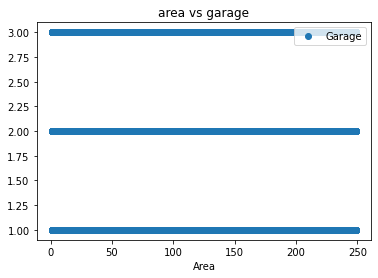

In [ ]:
df.plot(x='Area',y='Garage',style='o')
plt.title('area vs garage')
plt.xlabel=('area')
plt.ylabel=('garage')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
re=LinearRegression()
re

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X=df[['Area','FirePlace']]
Y=df['Swiming Pool']

In [ ]:
X

,Area,FirePlace
0,164,0
1,84,0
2,190,4
3,75,4
4,148,4
...,...,...
499995,128,4
499996,30,4
499997,174,3
499998,121,4


In [ ]:
Y

0         0
1         1
2         0
3         1
4         1
         ..
499995    1
499996    0
499997    1
499998    0
499999    0
Name: Swiming Pool, Length: 500000, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

,Area,FirePlace
288363,46,1
64982,47,1
227641,237,4
137672,19,0
12758,165,4
...,...,...
439107,220,2
117952,33,3
435829,2,0
305711,245,2


In [ ]:
Y_train

288363    0
64982     1
227641    1
137672    0
12758     1
         ..
439107    1
117952    1
435829    1
305711    0
461484    1
Name: Swiming Pool, Length: 400000, dtype: int64

In [ ]:
len(X_train)

400000

In [ ]:
len(Y_train)

400000

In [ ]:
len(X_test)

100000

In [ ]:
len(Y_test)

100000

In [ ]:
re.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pre=re.predict(X_test)
y_pre

array([0.50031904, 0.50039625, 0.49969149, ..., 0.50091655, 0.50059205,
       0.50019034])

In [ ]:
X_test

,Area,FirePlace
194257,195,2
396319,249,2
138738,142,0
66570,178,1
149424,46,4
...,...,...
362515,242,1
202955,48,3
285428,227,4
48361,193,3


In [ ]:
Y_test

194257    0
396319    0
138738    0
66570     1
149424    0
         ..
362515    1
202955    1
285428    1
48361     0
124893    1
Name: Swiming Pool, Length: 100000, dtype: int64

In [ ]:
re.score(X_test,Y_test)*100

8.283625023697283e-05

In [ ]:
re.score(X_train,Y_train)*100

6.509723674552602e-05

In [ ]:
from sklearn.metrics import mean_absolute_error,median_absolute_error

In [ ]:
mean_absolute_error(Y_test,y_pre)

0.4999978922410216

In [ ]:
median_absolute_error(Y_test,y_pre)

0.4999968806259345

In [ ]:
df1=pd.DataFrame({'Actual':Y_test,'Predicted':y_pre})
df1

,Actual,Predicted
194257,0,0.500319
396319,0,0.500396
138738,0,0.499691
66570,1,0.500019
149424,0,0.500658
...,...,...
362515,1,0.500110
202955,1,0.500385
285428,1,0.500917
48361,0,0.500592
